Train set R^2: 0.6477521398739496
Test set R^2: 0.64544502660219
Train set MSE: 30.75354736584933
Test set MSE: 30.5457327889102
Mean Squared Error : 30.571380905890503
Mean Absolute Error : 4.426690072074789


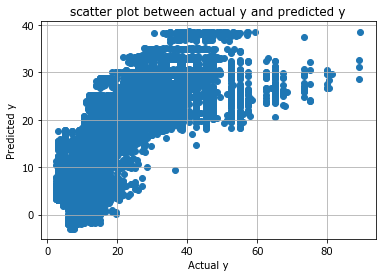

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error


#trying a very simple model, bad model
cleaned_data = pd.read_csv("data/cleaned.csv")
y = cleaned_data['price']
X = cleaned_data[['distance', 'ride_class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)
print("Train set R^2: "+str(model.score(X_train, y_train)))
print("Test set R^2: "+str(model.score(X_test, y_test)))

print("Train set MSE: "+str(mean_squared_error(model.predict(X_train), y_train)))
print("Test set MSE: "+str(mean_squared_error(model.predict(X_test), y_test)))


scaler = preprocessing.StandardScaler().fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

clf_ = SGDRegressor()
clf_.fit(x_train, y_train)
plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))
